<center><h1> Face and Facial Keypoint detection</h1></center>



>>1. Detect all the faces in an image using a face detector (Ex:Haar Cascade detector ).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform`.
3. Use your trained model to detect facial keypoints on the image.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

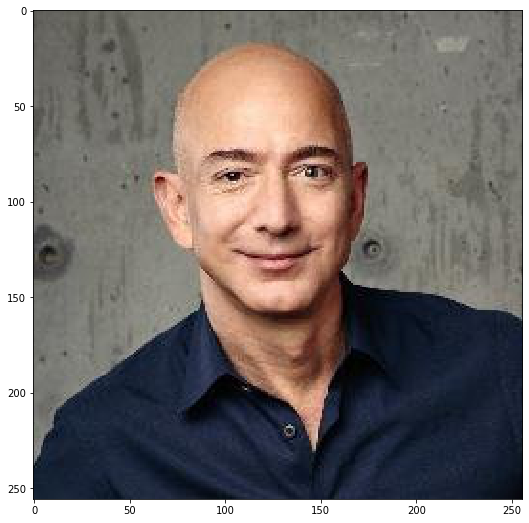

In [28]:
import cv2
image = cv2.imread('jeff.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

* Use OpenCV's pre-trained Haar Cascade classifiers.

* Loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). 


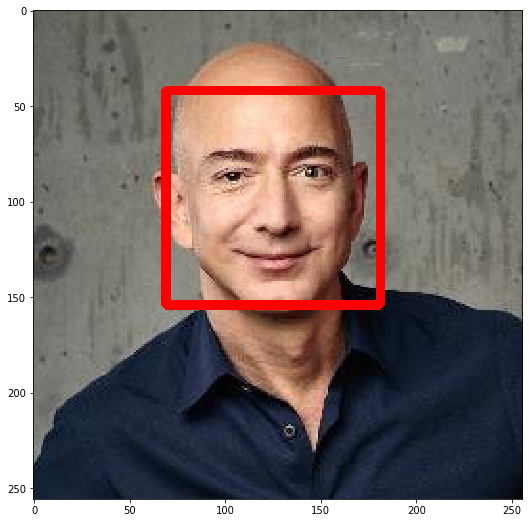

In [29]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

# Loading in a trained model


In [30]:
import torch
from models import Net

net = Net()
net.load_state_dict(torch.load('keypoints_model_test(1).pt'))
net.eval()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout2d(p=0.2, inplace=False)
  (batchNorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=15488, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Li

## Keypoint detection

we  loop over each detected face in an image and transform those faces in Tensors that the CNN can accept as input images.

### Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN .
4. Reshape the numpy image into a torch image.
5. Predict the keypoints.
6. To plot the keypoints you need to reverse their normalization.thats why we multiply by 50 and add 100 in the plot.


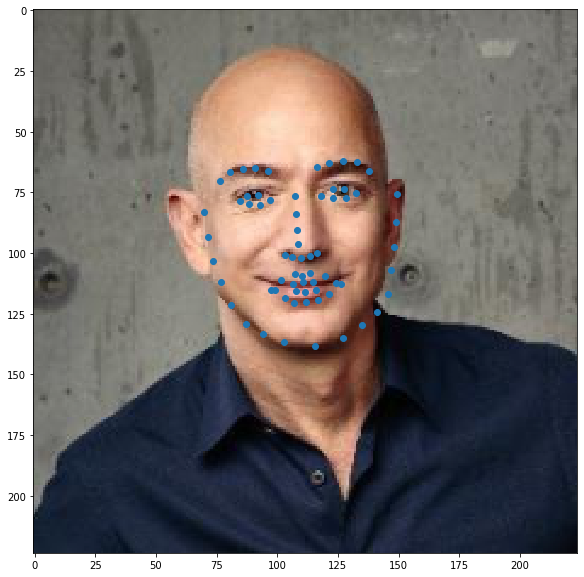

In [31]:
x=cv2.resize(image,(224,224))
    
# Convert the face region from RGB to grayscale
t1=cv2.cvtColor(x,cv2.COLOR_RGB2GRAY)

# Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
t1=t1/255.

# Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
t1=np.expand_dims(t1,0)

# Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
#roi2=roi2.transpose((2,0,1))
    
t1=torch.from_numpy(t1)
roi2=torch.unsqueeze(t1,0)

# Make facial keypoint predictions using your loaded, trained network 
output=net(roi2.float())
output=output.detach().numpy()
output=np.reshape(output,(68,2))

# Display each detected face and the corresponding keypoints   
plt.figure(figsize=(20,10))
plt.imshow(x)
plt.scatter(output[:,0]*50+100,output[:,1]*50+100)